In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os



In [ ]:
# Input for number of nodes
n = int(input("Enter number of nodes for which the simulations were run: "))

# Define file paths
file_paths = [
    f'../results/anly{n}.txt', 
    f'../results/uds{n}.txt', 
    f'../results/cds{n}.txt', 
    f'../results/plds{n}.txt'
]

data = {}
files_read = []

# Read data from available files
for file_path in file_paths:
    if os.path.exists(file_path):
        try:
            data[file_path] = np.loadtxt(file_path, delimiter=',', skiprows=2)
            files_read.append(file_path)
            print(f"Successfully read: {file_path}")
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# Ensure the analytical file is loaded
anly_file_path = f'../results/anly{n}.txt'
if anly_file_path not in data:
    raise FileNotFoundError(f"The analytical file {anly_file_path} must be available.")

# Ensure at least one additional file is read
if len(files_read) < 2:
    raise FileNotFoundError("Less than 2 files could be read. Please ensure at least the analytical file and one other file are available.")

# Extract the data
anly_data = data.get(anly_file_path)
uds_data = data.get(f'../results/uds{n}.txt')
cds_data = data.get(f'../results/cds{n}.txt')
plds_data = data.get(f'../results/plds{n}.txt')

# Print the data summary
print("\nLoaded Data Summary:")
for key, value in data.items():
    print(f"{key}: {value.shape}")

# Print the list of successfully read files
print("\nFiles Successfully Read:")
for file in files_read:
    print(file)

Successfully read: ../results/anly99.txt
Successfully read: ../results/uds99.txt
Successfully read: ../results/cds99.txt
Successfully read: ../results/plds99.txt


FileNotFoundError: The analytical file ../data/anly99.txt must be available.

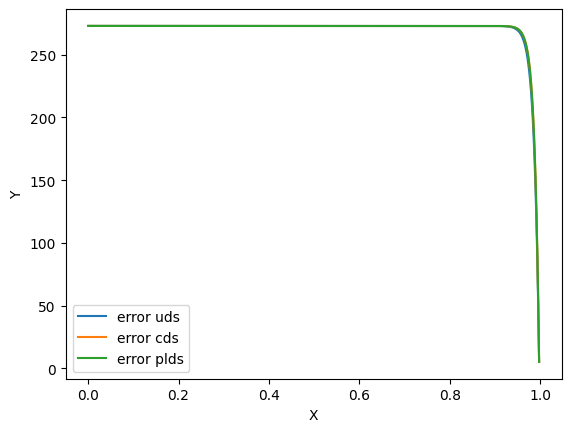

In [ ]:
plt.plot(anly_data[:, 0], uds_data[:, 1], label='uds')
plt.plot(anly_data[:, 0], cds_data[:, 1], label='cds')
plt.plot(anly_data[:, 0], plds_data[:, 1], label='plds')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


MSE (anly - uds): 21.87120321619999
MSE (anly - cds): 14.1041392893
MSE (anly - plds): 14.355135195459999


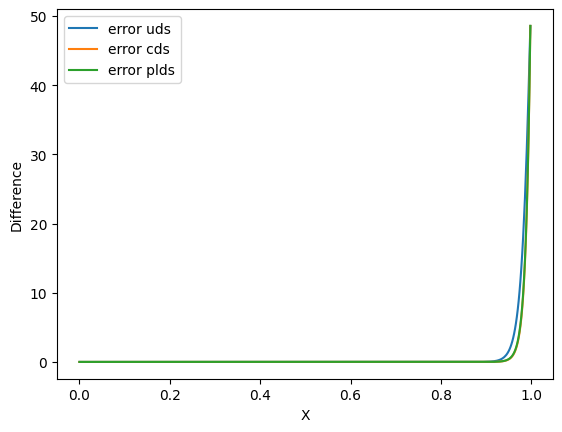

In [ ]:

# Calculate differences
diff_uds = anly_data[:, 1] - uds_data[:, 1]
diff_cds = anly_data[:, 1] - cds_data[:, 1]
diff_plds = anly_data[:, 1] - plds_data[:, 1]

# Calculate MSE
mse_uds = np.mean(diff_uds**2)
mse_cds = np.mean(diff_cds**2)
mse_plds = np.mean(diff_plds**2)

print(f"MSE (anly - uds): {mse_uds}")
print(f"MSE (anly - cds): {mse_cds}")
print(f"MSE (anly - plds): {mse_plds}")

# Plot differences
plt.plot(anly_data[:, 0], diff_uds, label='error uds')
plt.plot(anly_data[:, 0], diff_cds, label='error cds')
plt.plot(anly_data[:, 0], diff_plds, label='error plds')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Difference')
plt.legend()
plt.show()

